### Medical Data Visualiser

##### Testing for the third project of freeCodeCamp's Data Analysis with Python certificate. Here, a much more clear Jupyter Notebooks file is used to showcase the steps taken to answer a few questions using the provided csv (medical_examination.csv).

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [6]:
df = pd.read_csv('medical_examination.csv')

In [7]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
BMI = (df['weight'] / (df['height'] / 100) ** 2)
df['overweight'] = (BMI > 25).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [9]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [10]:
df['cholesterol'].value_counts()

cholesterol
0    52385
1    17615
Name: count, dtype: int64

In [11]:
df['gluc'].value_counts()

gluc
0    59479
1    10521
Name: count, dtype: int64

In [12]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


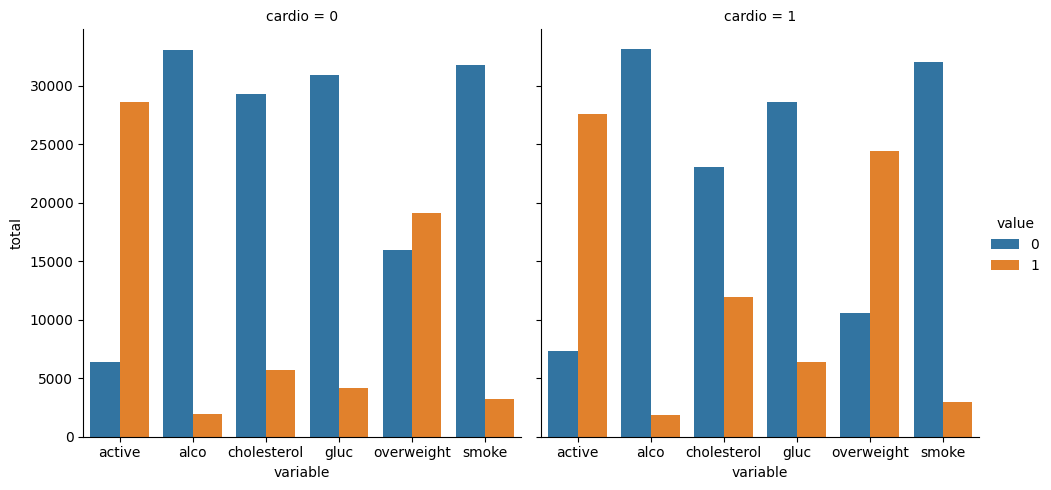

In [41]:
def draw_cat_plot():
    df_cat = pd.melt(df,
                     id_vars=['cardio'],
                     value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

    fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')

    fig.savefig('catplot.png')
    return fig

draw_cat_plot();

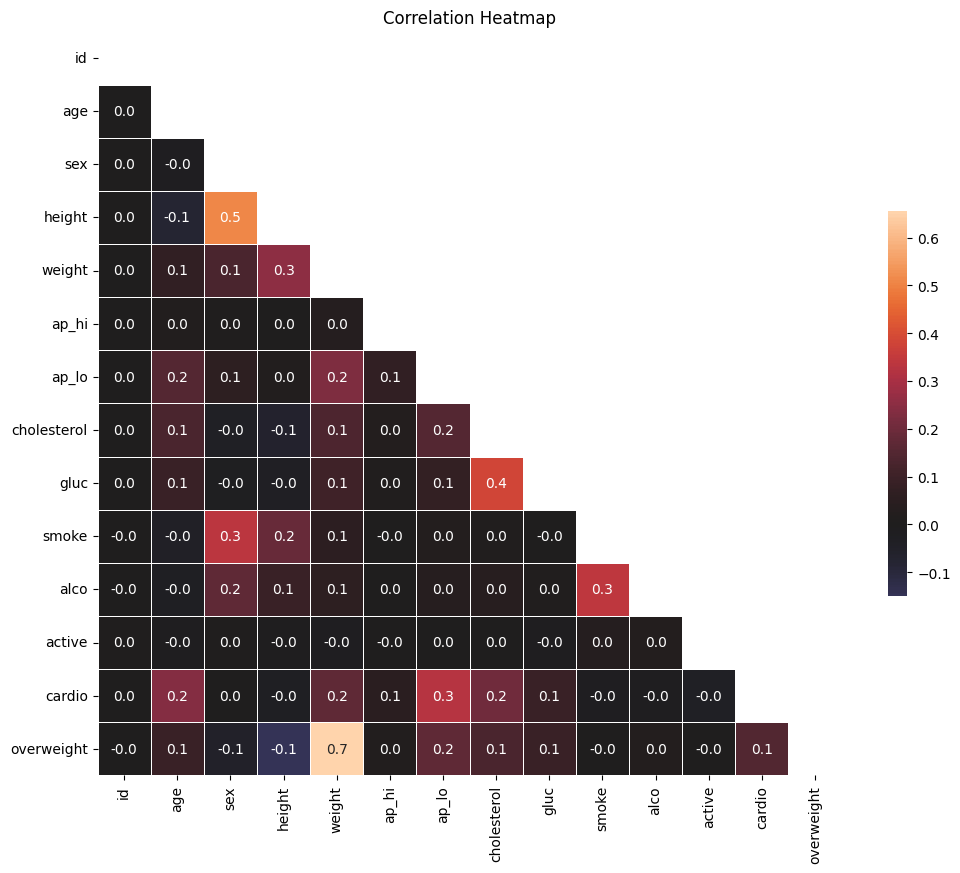

In [46]:
def draw_heat_map():
    df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) &
    (df['height'] >= df['height'].quantile(0.025)) &
    (df['height'] <= df['height'].quantile(0.975)) &
    (df['weight'] >= df['weight'].quantile(0.025)) &
    (df['weight'] <= df['weight'].quantile(0.975))]

    corr = df_heat.corr(numeric_only=True)

    mask = np.triu(np.ones_like(corr, dtype=bool))

    fig, ax = plt.subplots(figsize=(12, 10))
    sns.heatmap(corr, 
            mask=mask, 
            annot=True,
            fmt=".1f", 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5}, 
            ax=ax)
    ax.set_title('Correlation Heatmap')

    fig.savefig('heatmap.png')
    return fig

draw_heat_map();